# Pole stiction

This notebook is intended to characterize the slow speed stiction problem \
at the pole by spiraling into the pole where the tracking speeds will be slower and slower. \
Craig Lage - 17-Oct-22

In [9]:
import asyncio
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

from lsst.ts import salobj

from lsst.ts.observatory.control.auxtel.atcs import ATCS
from lsst.ts.observatory.control.auxtel.latiss import LATISS
from lsst.ts.observatory.control.utils import RotType

In [2]:
logger = logging.getLogger(f"Daytime Checkout {Time.now()} UT")
logger.level = logging.DEBUG

In [3]:
logger.info(os.environ["OSPL_URI"])
logger.info(os.environ["LSST_DDS_PARTITION_PREFIX"])

### Instantiate the control classes

In [5]:
domain = salobj.Domain()
atcs = ATCS(domain)
latiss = LATISS(domain)
await asyncio.gather(atcs.start_task, latiss.start_task)

[[None, None, None, None, None, None, None], [None, None, None, None]]

In [ ]:
with_latiss=True

## Enable LATISS and ATCS

In [ ]:
await latiss.enable()
await atcs.enable()

If ATCamera and/or ATOODS don't come up, see section `Quick Troubleshooting` for support commands. 

### Bias verification

In [ ]:
await latiss.take_bias(nbias=1)

In [ ]:
await atcs.disable_dome_following()

### Plot planned locations in RA/Dec space

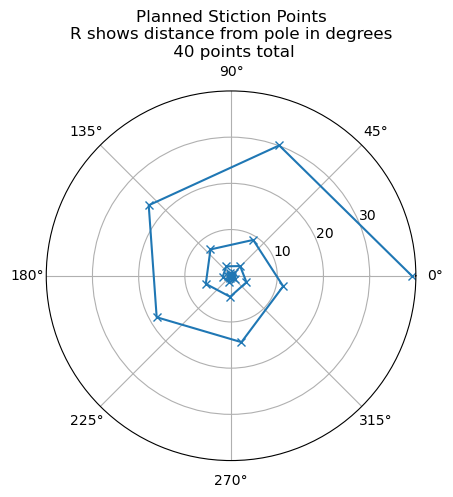

In [36]:
ra = 0.0
deltaRa = 0.5
logCosDec = -0.2
deltaLogCosDec = -0.1
thetas = []
decs = []
for i in range(40):
    theta = ra * 15.0
    dec = np.arccos(10**logCosDec) * 180.0 / np.pi
    #print(logCosDec, dec, 90.0-dec)
    thetas.append(theta)
    decs.append(90.0 - dec)
    ra += deltaRa
    logCosDec += deltaLogCosDec
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas, decs, marker = 'x')
ax.set_rmax(40.0)
ax.set_rticks([10.0, 20.0, 30.0])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Planned Stiction Points\nR shows distance from pole in degrees\n 40 points total")
plt.show()

### Now run the actual test, taking a 30 second image at each location.

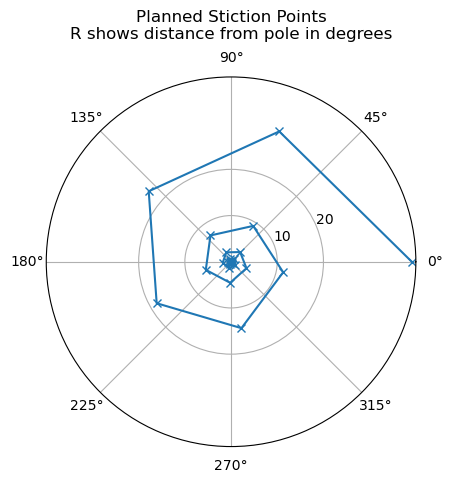

In [34]:
ra = 0.0
deltaRa = 0.5
logCosDec = -0.2
deltaLogCosDec = -0.1
for i in range(40):
    dec = np.arccos(10**logCosDec) * 180.0 / np.pi
    ra += deltaRa
    logCosDec += deltaLogCosDec
    await atcs.slew_icrs(ra, dec, rot=start_rot)
    await latiss.take_engtest(30.0, filter='empty_1',grating='empty_1')


In [ ]:
# Stop tracking
await atcs.stop_tracking()

## Shutdown all ATCS components

In [ ]:
await atcs.shutdown()

## Put LATISS in standby

In [ ]:
await latiss.standby()